In [5]:
# 5.2.1 데이터 내려받기

# 훈련, 검증, 테스트 폴더로 이미지 복사하기
import os, shutil

original_dataset_dir = "train"

base_dir = "cats_and_dogs"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] # 처음 1000개의 고양이 이미지를 train_cats_dir에 복사한다.
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] # 다음 500개의 고양이 이미지를 validation_cats_dir에 복사한다.
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] # 다음 500개의 고양이 이미지를 test_cats_dir에 복사한다.
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] # 처음 1000개의 강아지 이미지를 train_cats_dir에 복사한다.
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] # 다음 500개의 강아지 이미지를 validation_cats_dir에 복사한다.
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)] # 다음 500개의 강아지 이미지를 test_cats_dir에 복사한다.
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
print('훈련용 고양이 이미지 전체 개수 :', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수 :', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수 :', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수 :', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수 :', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수 :', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수 : 1000
훈련용 강아지 이미지 전체 개수 : 1000
검증용 고양이 이미지 전체 개수 : 500
검증용 강아지 이미지 전체 개수 : 500
테스트용 고양이 이미지 전체 개수 : 500
테스트용 강아지 이미지 전체 개수 : 500


In [6]:
# 5.2.2 네트워크 구성하기

# 강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [7]:
# 모델의 훈련 설정하기
from keras import optimizers

model.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ["acc"])

In [9]:
# 5.2.3 데이터 전처리
# 데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 전처리되어 있어야 한다.
# (1) 사진 파일을 읽는다.
# (2) JPEG 컨텐츠를 RGB 픽셀 값으로 디코딩한다.
# (3) 부동 소수 타입의 텐서로 변환한다.
# (4) 픽셀 값(0 ~ 255)의 스케일을 [0, 1] 사이로 조정한다.
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = "binary")
                                                  # 타깃 디렉토리     바꿀 이미지 크기

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 20, class_mode = "binary")

for data_batch, labels_batch in train_generator:
    print("배치 데이터 크기 :", data_batch.shape)
    print("배치 레이블 크기 :", labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
배치 데이터 크기 : (20, 150, 150, 3)
배치 레이블 크기 : (20,)


In [11]:
# 배치 제너레이터를 사용하여 모델 훈련하기
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 5, 
                              validation_data = validation_generator, validation_steps = 50)

# 모델 저장하기
model.save("cats_and_dogs_1.h5")

Epoch 1/5
100/100 [==============================] - 247s 2s/step - loss: 0.4473 - acc: 0.7825 - val_loss: 0.5350 - val_acc: 0.7290
Epoch 2/5
100/100 [==============================] - 255s 3s/step - loss: 0.4274 - acc: 0.8030 - val_loss: 0.5880 - val_acc: 0.7020
Epoch 3/5
100/100 [==============================] - 254s 3s/step - loss: 0.4007 - acc: 0.8145 - val_loss: 0.6090 - val_acc: 0.6970
Epoch 4/5
100/100 [==============================] - 250s 2s/step - loss: 0.3774 - acc: 0.8320 - val_loss: 0.5645 - val_acc: 0.7220
Epoch 5/5
100/100 [==============================] - 252s 3s/step - loss: 0.3554 - acc: 0.8470 - val_loss: 0.5933 - val_acc: 0.7210


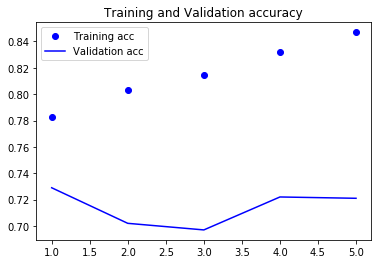

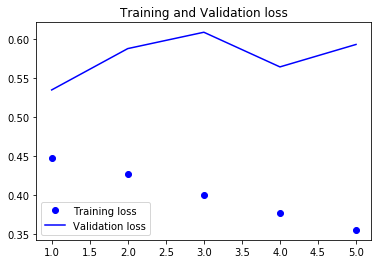

In [12]:
# 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()

In [14]:
# 5.2.4 데이터 증식 사용하기
# 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘린다.
# 훈련할 때 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표이다.

# ImageDataGenerator를 사용하여 데이터 증식 설정하기
datagen = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.1, height_shift_range = 0.1, 
                             shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = "nearest")
# rotation_range : 랜덤하게 사진을 회전시킬 각도 범위(0 ~ 180)
# width_shift_range / height_shift_range : 사진을 수평, 수직으로 랜덤하게 평행 이동시킬 범위 (전체 넓이와 높이에 대한 비율)
# shear_range : 랜덤하게 전단 변환을 적용할 각도 범위 (rotation_range로 회전할 때 y축 방향으로 각도를 증가시켜 이미지를 변형)
# zoom_range : 랜덤하게 사진을 확대할 범위
# horizontal_flip : 랜덤하게 이미지를 수평으로 뒤집는다.
# fill_mode : 회전이나 가로 / 세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채우는 전략

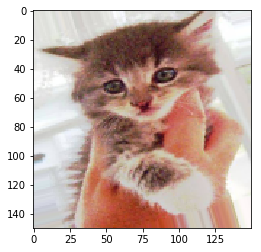

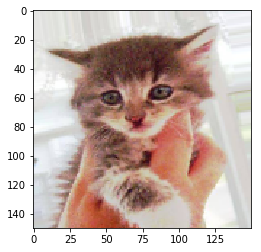

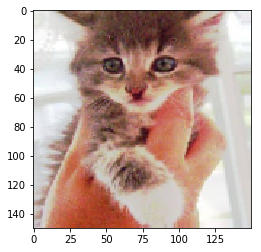

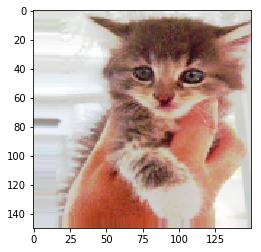

In [15]:
# 랜덤하게 증식된 훈련 이미지 그리기
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3] # 증식할 이미지 선택

img = image.load_img(img_path, target_size = (150, 150)) # 이미지를 읽고  크기를 변경한다.

x = image.img_to_array(img) # (150, 150, 3) 크기의 넘파이 배열로 변환한다.
x = x.reshape((1, ) + x.shape) # (1, 150, 150, 3) 크기로 변환한다.

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [18]:
# 드롭아웃을 포함한 새로운 컨브넷 정의하기
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = optimizers.RMSprop(lr = 1e-4), loss = "binary_crossentropy", metrics = ["acc"])

# 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기
train_datagen = ImageDataGenerator(rescale = 1. / 255, rotation_range = 40, width_shift_range = 0.2,
                                   height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, )
test_datagen = ImageDataGenerator(rescale = 1. / 255) # 검증 데이터는 증식되면 안된다.

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 32, class_mode = "binary")
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 32, class_mode = "binary")

history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 5, 
                              validation_data = validation_generator, validation_steps = 50)

model.save("cats_and_dogs_2.h5")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - 452s 5s/step - loss: 0.6912 - acc: 0.5238 - val_loss: 0.6895 - val_acc: 0.5044
Epoch 2/5
100/100 [==============================] - 401s 4s/step - loss: 0.6800 - acc: 0.5637 - val_loss: 0.6586 - val_acc: 0.6063
Epoch 3/5
100/100 [==============================] - 481s 5s/step - loss: 0.6709 - acc: 0.5925 - val_loss: 0.6504 - val_acc: 0.6256
Epoch 4/5
100/100 [==============================] - 427s 4s/step - loss: 0.6625 - acc: 0.6059 - val_loss: 0.6321 - val_acc: 0.6566
Epoch 5/5
100/100 [==============================] - 442s 4s/step - loss: 0.6432 - acc: 0.6331 - val_loss: 0.6456 - val_acc: 0.6142
